In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
import os, sys
from google.colab import drive

In [ ]:
import os, sys
from google.colab import drive

In [ ]:
dataset=pd.read_csv('deaths-and-new-cases-of-hiv.csv')

In [ ]:
dataset.head(5)

,Entity,Code,Year,Deaths from HIV/AIDS (deaths),New infections of HIV/AIDS (new cases of HIV infection),Number of people living with HIV (tens) (tens of people living with HIV)
0,Afghanistan,AFG,1990,20.994691,59.576253,35.574281
1,Afghanistan,AFG,1991,24.773236,61.450252,38.847283
2,Afghanistan,AFG,1992,29.214797,65.311691,43.475791
3,Afghanistan,AFG,1993,34.121142,69.719780,48.843481
4,Afghanistan,AFG,1994,39.046899,73.991685,54.527406


###     A data source was downloaded from "Our World In Data" (https://ourworldindata.org) - an online publication that presents data on how living conditions around the world are changing. The data source which was chosen for this project represents a global overview of the HIV and AIDS epidemics, showing data on deaths, new cases, and number of people living with the disease.

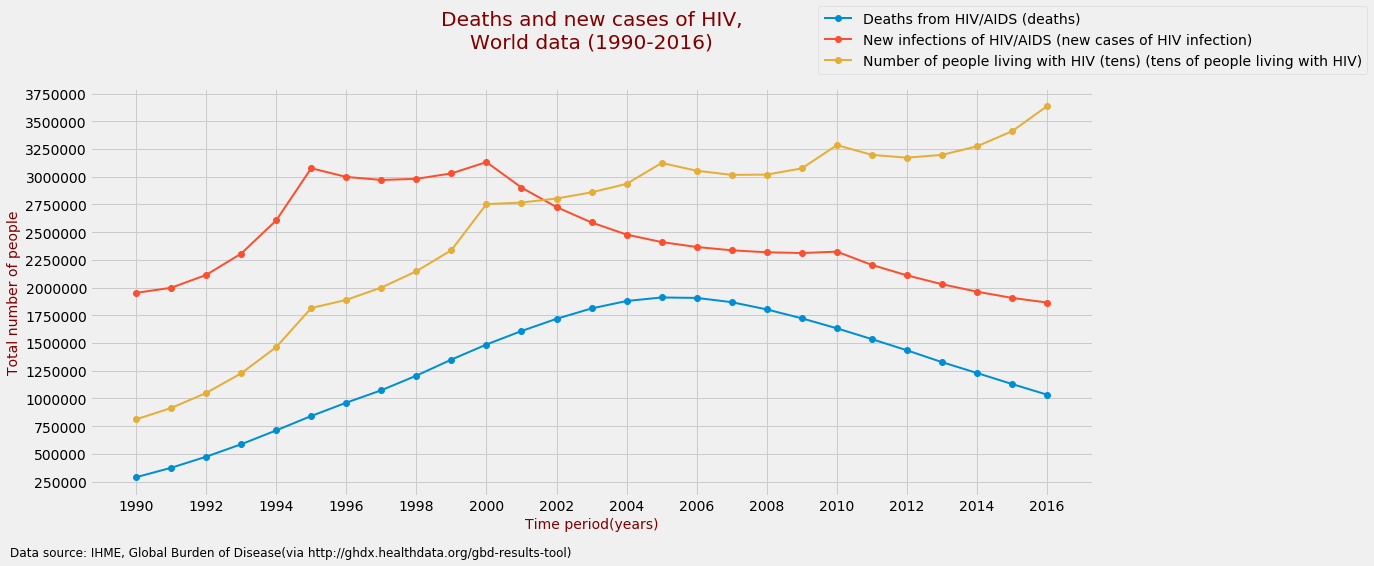

In [ ]:
world=dataset.groupby('Entity').get_group('World')
dates=[]
values=[]

for x in world.values:
    dates.append(x[2])
    values.append(x[3:])

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,7))    
obj=plt.plot(dates,values, linewidth=2, marker='o' )
plt.legend(obj, 
           ('Deaths from HIV/AIDS (deaths)', 
            'New infections of HIV/AIDS (new cases of HIV infection)', 
            'Number of people living with HIV (tens) (tens of people living with HIV)'), 
           bbox_to_anchor=(1, 1), loc=8, borderaxespad=1.)
plt.annotate('Data source: IHME, Global Burden of Disease(via http://ghdx.healthdata.org/gbd-results-tool)', (0,0), (-80,-50), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.xlabel('Time period(years)', fontsize=14, color='maroon') 
plt.ylabel('Total number of people', fontsize=14, color='maroon')
plt.locator_params(nbins=17)
plt.title('Deaths and new cases of HIV,\nWorld data (1990-2016)', color='maroon', pad=40)
plt.show()

In [ ]:
import pyodbc 
conn = pyodbc.connect('Driver={SQL server};'
                      'Server=DESKTOP-M9MS1AB\SQLEXPRESS;'
                      'Database=Project;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

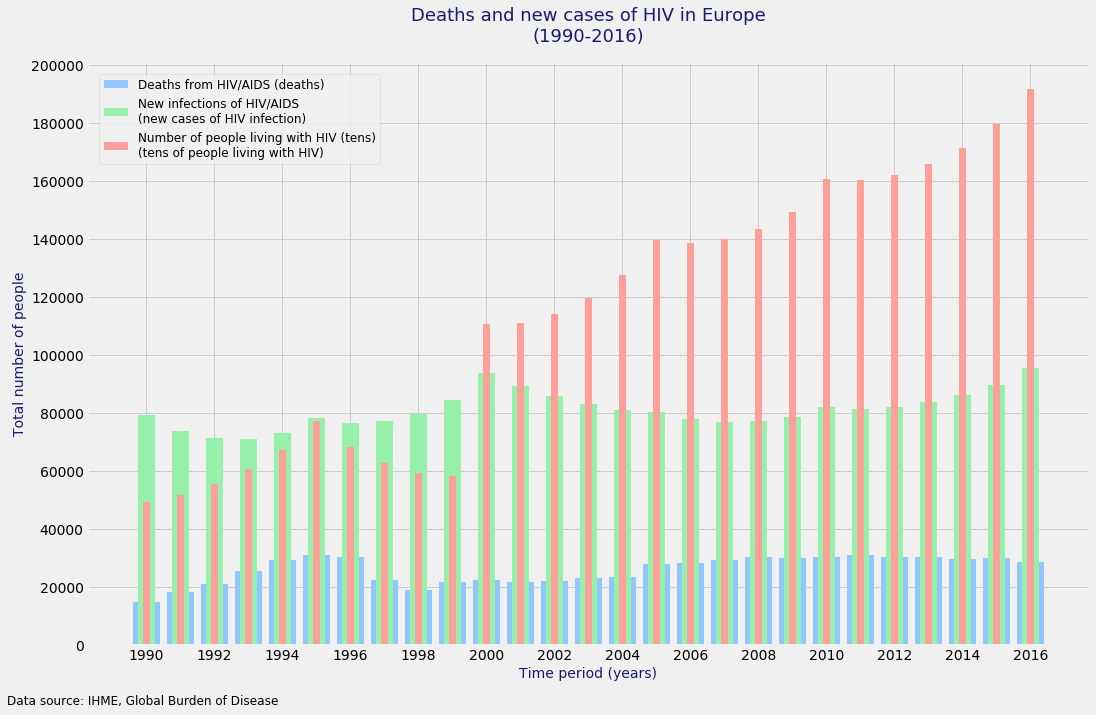

In [ ]:
cursor.execute("SELECT DISTINCT (Year), sum(Deaths_from_HIV_AIDS__deaths_) as deaths, sum(New_infections_of_HIV_AIDS__new_cases_of_HIV_infection_) as new_infections, sum(Number_of_people_living_with_HIV__tens___tens_of_people_living_with_HIV_) as people_living FROM dbo.hivw WHERE Entity LIKE '%Europe%' GROUP BY (Year)")
rows=cursor.fetchall()

years=[]
deaths=[]
new=[]
existing=[]
for x in rows:
    years.append(x[0])
    deaths.append(x[1])
    new.append(x[2])
    existing.append(x[3])
    
    
plt.style.use('seaborn-pastel')    
plt.figure(figsize=(16,10))
plt.bar(tuple(years), tuple(deaths), 0.8)
plt.bar(tuple(years), tuple(new), 0.5)
plt.bar(tuple(years), tuple(existing), 0.2)
plt.locator_params(nbins=17)
plt.legend( 
           ('Deaths from HIV/AIDS (deaths)', 
            'New infections of HIV/AIDS\n(new cases of HIV infection)', 
            'Number of people living with HIV (tens)\n(tens of people living with HIV)'), fontsize=12,
           bbox_to_anchor=(0, 1), loc=2, borderaxespad=1.)
plt.title('Deaths and new cases of HIV in Europe\n(1990-2016)', color='midnightblue', fontsize=18, pad=20)
plt.xlabel('Time period (years)', color='midnightblue', fontsize=14)
plt.ylabel('Total number of people', color='midnightblue', fontsize=14)
plt.annotate('Data source: IHME, Global Burden of Disease', (0,0), (-80,-50), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


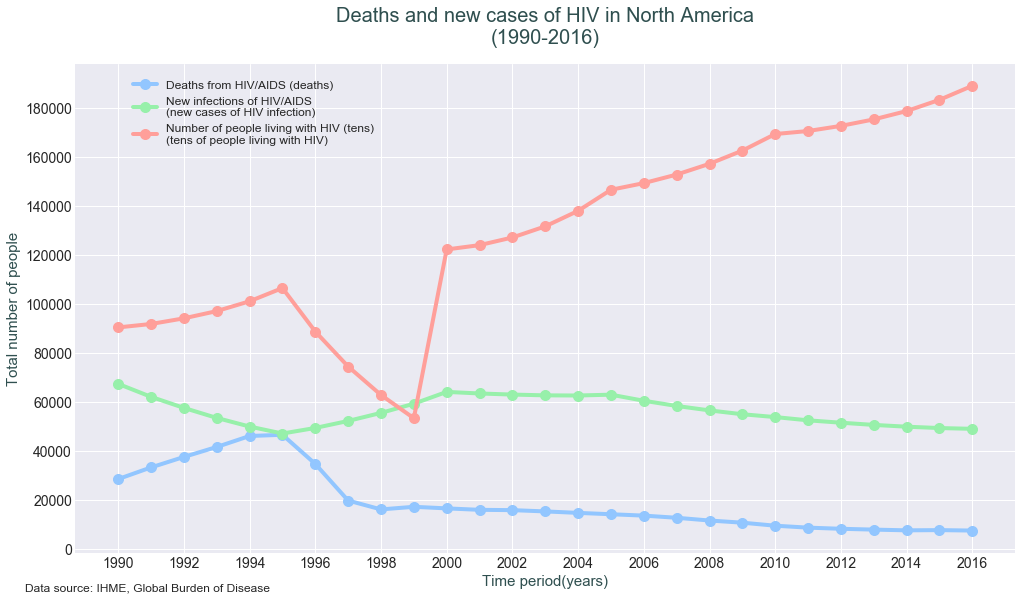

In [ ]:
NA=dataset.groupby('Entity').get_group('North America')

%matplotlib inline 

dates=[]
values=[]

for x in NA.values:
    dates.append(x[2])
    values.append(x[3:])
    

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,9))
obj=plt.plot(dates, values, linewidth=4, marker='o', markersize=10)
plt.legend(obj, 
           ('Deaths from HIV/AIDS (deaths)', 
            'New infections of HIV/AIDS\n(new cases of HIV infection)', 
            'Number of people living with HIV (tens)\n(tens of people living with HIV)'), fontsize=12, 
           bbox_to_anchor=(0.4, 0.9), loc=5, borderaxespad=6.)
plt.title("Deaths and new cases of HIV in North America\n(1990-2016)", fontsize=20, color='darkslategrey', pad=20)
plt.xlabel('Time period(years)', fontsize=15, color='darkslategrey')
plt.ylabel('Total number of people', fontsize=15, color='darkslategrey')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.annotate('Data source: IHME, Global Burden of Disease', (0,0), (-50,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.locator_params(nbins=17)

plt.show()




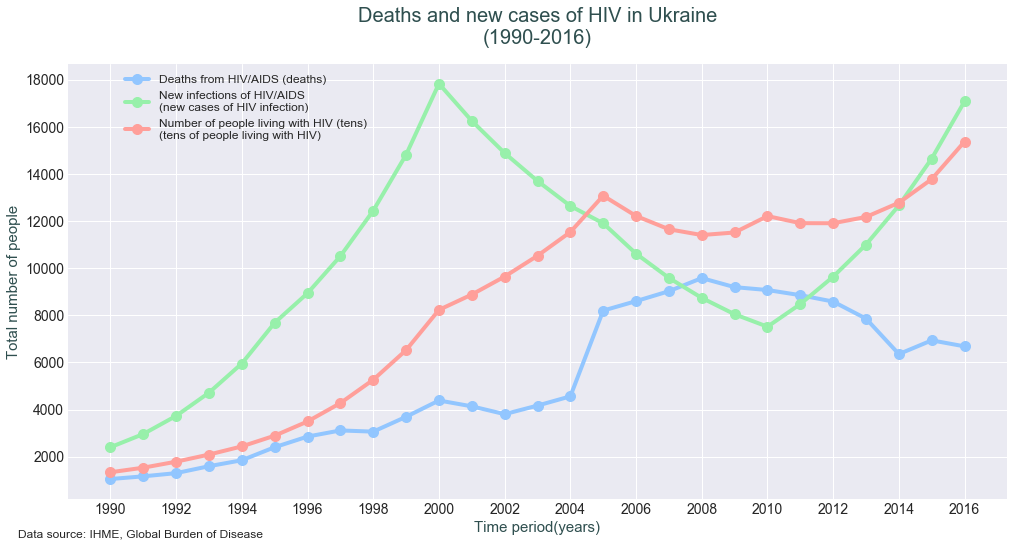

In [ ]:
NA=dataset.groupby('Entity').get_group('Ukraine')

%matplotlib inline 

dates=[]
values=[]

for x in NA.values:
    dates.append(x[2])
    values.append(x[3:])
    

plt.style.use('seaborn-pastel')
plt.figure(figsize=(15,8))
obj=plt.plot(dates, values, linewidth=4, marker='o', markersize=10)
plt.legend(obj, 
           ('Deaths from HIV/AIDS (deaths)', 
            'New infections of HIV/AIDS\n(new cases of HIV infection)', 
            'Number of people living with HIV (tens)\n(tens of people living with HIV)'), fontsize=12, 
           bbox_to_anchor=(0.4, 0.9), loc=5, borderaxespad=6.)
plt.title("Deaths and new cases of HIV in Ukraine\n(1990-2016)", fontsize=20, color='darkslategrey', pad=20)
plt.xlabel('Time period(years)', fontsize=15, color='darkslategrey')
plt.ylabel('Total number of people', fontsize=15, color='darkslategrey')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.annotate('Data source: IHME, Global Burden of Disease', (0,0), (-50,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.locator_params(nbins=17)

plt.show()



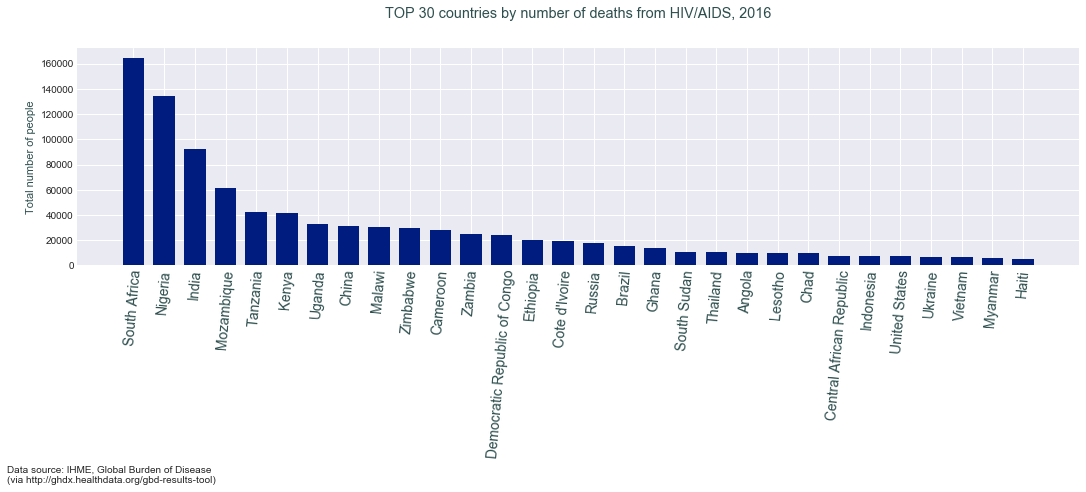

In [ ]:
cursor = conn.cursor()
cursor.execute('SELECT TOP 30 Entity, Deaths_from_HIV_AIDS__deaths_ FROM dbo.hiv WHERE Year=2016 and Code is not null ORDER BY Deaths_from_HIV_AIDS__deaths_ desc ')
rows=cursor.fetchall()

N=len(rows)
ind = np.arange(N)

val=[]
ticks=[]

for row in rows:
    val.append(row[1])
    ticks.append(row[0])
    
plt.style.use('seaborn-dark-palette')    
plt.figure(figsize=(16,4))
plt.bar(ind, tuple(val), 0.7)
plt.title("TOP 30 countries by number of deaths from HIV/AIDS, 2016", color='darkslategray',pad=30)
plt.xticks(ind, tuple(ticks), rotation=85, fontsize=14, color='darkslategray' )
plt.ylabel('Total number of people', color='darkslategray', fontsize=11)
plt.annotate('Data source: IHME, Global Burden of Disease\n(via http://ghdx.healthdata.org/gbd-results-tool)', (0,0), (-70,-200), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
data_for_map=dataset.loc[(dataset['Year']==2016)&(dataset['Code']!="NULL")]
merged = world.merge(data_for_map, left_on='iso_a3', right_on='Code')

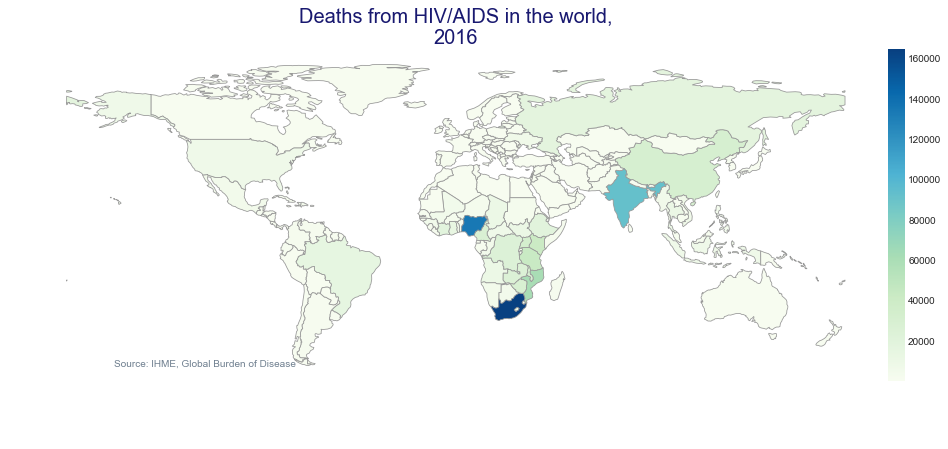

In [ ]:
variable = 'Deaths from HIV/AIDS (deaths)'
vmin1=merged.min(axis=0)['Deaths from HIV/AIDS (deaths)']
vmax1=merged.max(axis=0)['Deaths from HIV/AIDS (deaths)']

fig, ax = plt.subplots(1, figsize=(14, 10))
merged.dropna().plot(column=variable, cmap='GnBu', ax=ax, k=10, linewidth=0.8, edgecolor='0.6')

ax.axis('off')
ax.set_title('Deaths from HIV/AIDS in the world,\n2016', 
             fontdict={'fontsize': '20', 'fontweight' : '20', 'color': 'midnightblue'})
ax.annotate('Source: IHME, Global Burden of Disease', 
            xy=(0.12, 0.2),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=10, 
            color='slategrey')


sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=vmin1, vmax=vmax1))
sm._A = []
divider=make_axes_locatable(ax)
cax=divider.append_axes("right", size="2%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax)


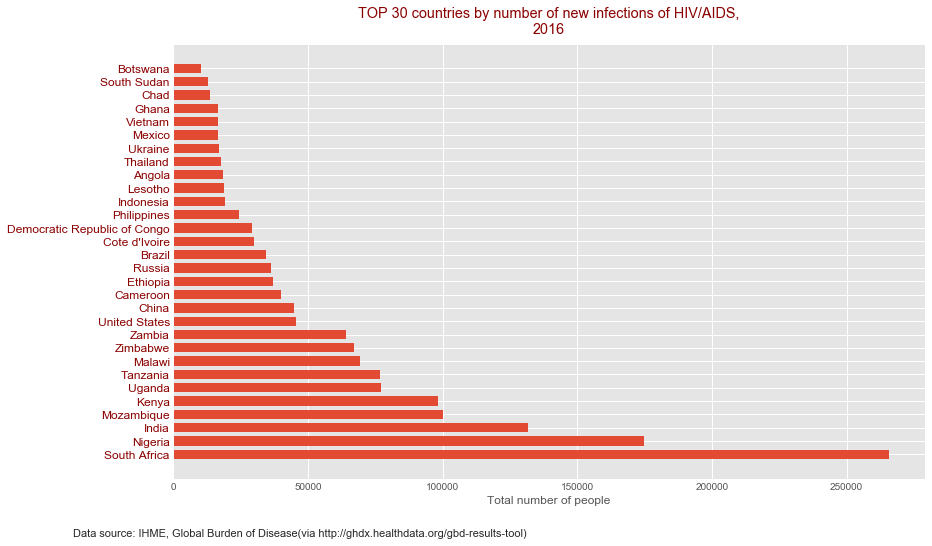

In [ ]:
cursor = conn.cursor()
cursor.execute('SELECT TOP 30 Entity, New_infections_of_HIV_AIDS__new_cases_of_HIV_infection_ FROM dbo.hiv WHERE Year=2016 and Code is not null ORDER BY New_infections_of_HIV_AIDS__new_cases_of_HIV_infection_ desc ')
rows=cursor.fetchall()

N=len(rows)
ind = np.arange(N)

val=[]
ticks=[]

for row in rows:
    ticks.append(row[0])
    val.append(row[1])

plt.style.use('ggplot')    
plt.figure(figsize=(12,8))
plt.barh(ind, tuple(val), 0.7)
plt.title("TOP 30 countries by number of new infections of HIV/AIDS,\n2016", color='darkred', pad=10)
plt.annotate('Data source: IHME, Global Burden of Disease(via http://ghdx.healthdata.org/gbd-results-tool)', (0,0), (-100,-50), fontsize=11, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.yticks(ind, tuple(ticks), fontsize=12, color='darkred')
plt.xlabel('Total number of people')
plt.show()

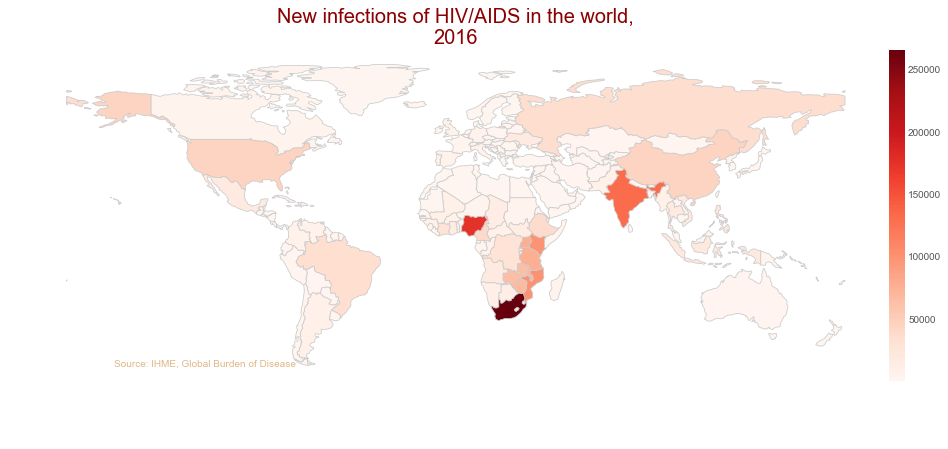

In [ ]:
variable = 'New infections of HIV/AIDS (new cases of HIV infection)'
vmin=merged.min(axis=0)['New infections of HIV/AIDS (new cases of HIV infection)']
vmax=merged.max(axis=0)['New infections of HIV/AIDS (new cases of HIV infection)']

fig, ax = plt.subplots(1, figsize=(14, 10))
merged.dropna().plot(column=variable, cmap='Reds', ax=ax, k=20, linewidth=0.8, edgecolor='0.8')

ax.axis('off')
ax.set_title('New infections of HIV/AIDS in the world,\n2016', 
             fontdict={'fontsize': '20', 'fontweight' : '20', 'color': 'darkred'})
ax.annotate('Source: IHME, Global Burden of Disease', 
            xy=(0.12, 0.2),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=10, 
            color='burlywood')


sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
divider=make_axes_locatable(ax)
cax=divider.append_axes("right", size="2%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax)


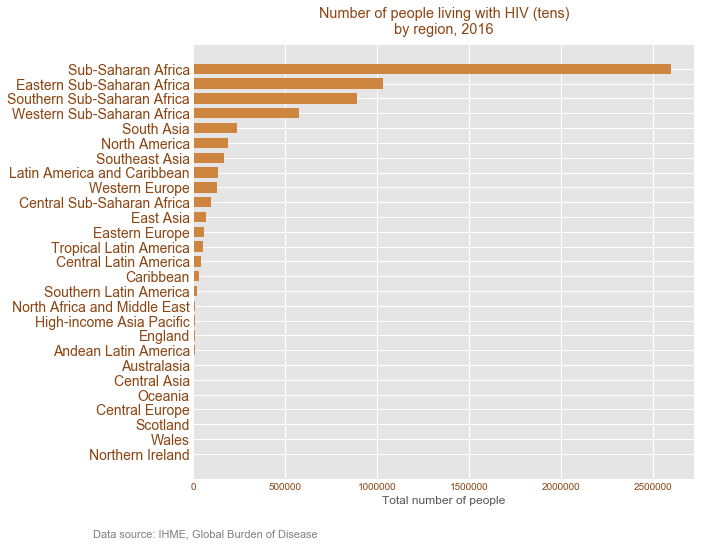

In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT [Entity], [Number_of_people_living_with_HIV__tens___tens_of_people_living_with_HIV_] FROM dbo.hiv WHERE Year=2016 AND Code IS NULL AND Entity NOT LIKE '%SDI%' ORDER BY Number_of_people_living_with_HIV__tens___tens_of_people_living_with_HIV_ ASC")
rows=cursor.fetchall()

N=len(rows)
ind = np.arange(N)

val=[]
ticks=[]

for row in rows:
    ticks.append(row[0])
    val.append(row[1])
    
plt.style.use('ggplot')    
plt.figure(figsize=(8,8))
plt.barh(ind, tuple(val), 0.7, color='peru')
plt.title("Number of people living with HIV (tens)\nby region, 2016", pad=10, color='saddlebrown')
plt.yticks(ind, tuple(ticks), fontsize=14, color='saddlebrown')
plt.xticks(color='saddlebrown')
plt.xlabel('Total number of people')
plt.annotate('Data source: IHME, Global Burden of Disease', (0,0), (-100,-50), color='gray', fontsize=11, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()


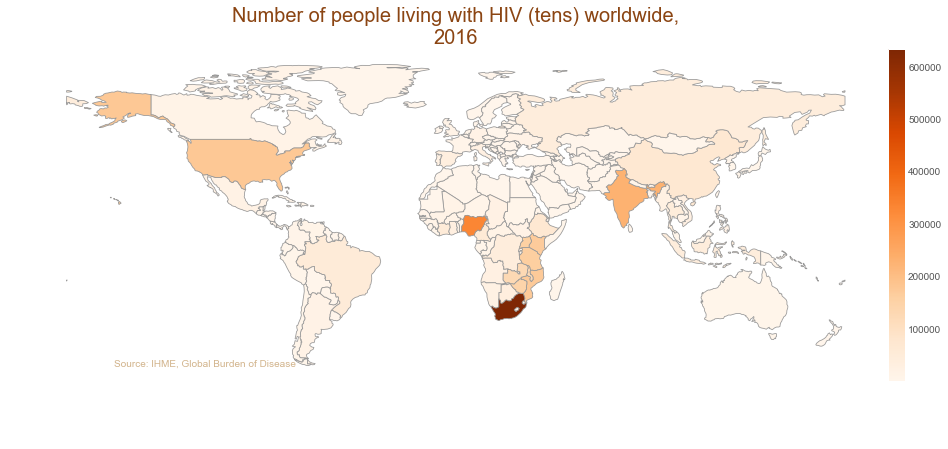

In [ ]:
variable = 'Number of people living with HIV (tens) (tens of people living with HIV)'
vmin2=merged.min(axis=0)['Number of people living with HIV (tens) (tens of people living with HIV)']
vmax2=merged.max(axis=0)['Number of people living with HIV (tens) (tens of people living with HIV)']
cmap='Oranges'

fig, ax = plt.subplots(1, figsize=(14, 10))
merged.dropna().plot(column=variable, cmap=cmap, ax=ax, k=10, linewidth=0.8, edgecolor='0.6')

ax.axis('off')
ax.set_title('Number of people living with HIV (tens) worldwide,\n2016', 
             fontdict={'fontsize': '20', 'fontweight' : '20', 'color': 'saddlebrown'})
ax.annotate('Source: IHME, Global Burden of Disease', 
            xy=(0.12, 0.2),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=10, 
            color='tan')


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin2, vmax=vmax2))
sm._A = []
divider=make_axes_locatable(ax)
cax=divider.append_axes("right", size="2%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax)

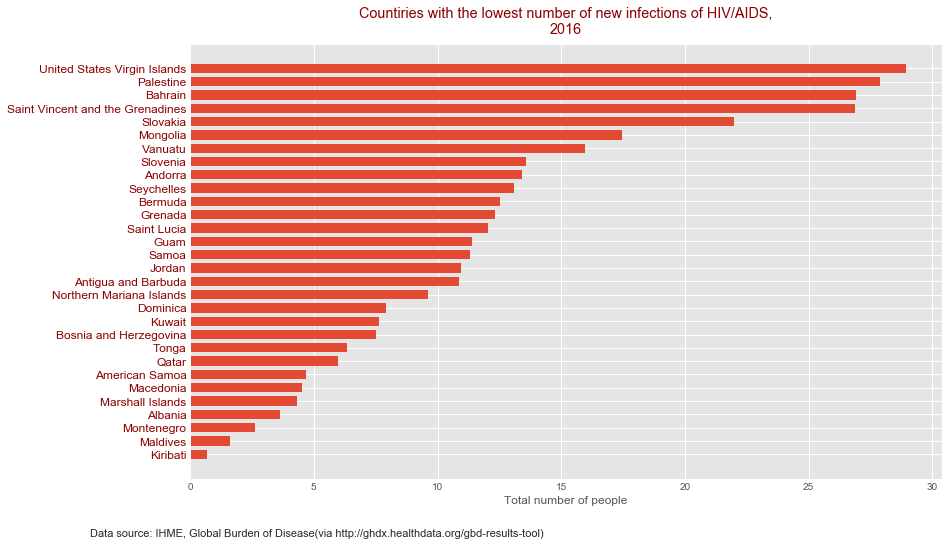

In [ ]:
cursor = conn.cursor()
cursor.execute('SELECT TOP 30 Entity, Number_of_people_living_with_HIV__tens___tens_of_people_living_with_HIV_ FROM dbo.hiv WHERE Year=2016 and Code is not null ORDER BY Number_of_people_living_with_HIV__tens___tens_of_people_living_with_HIV_ asc ')
rows=cursor.fetchall()

N=len(rows)
ind = np.arange(N)

val=[]
ticks=[]

for row in rows:
    ticks.append(row[0])
    val.append(row[1])

plt.style.use('ggplot')    
plt.figure(figsize=(12,8))
plt.barh(ind, tuple(val), 0.7)
plt.title("Countiries with the lowest number of new infections of HIV/AIDS,\n2016", color='darkred', pad=10)
plt.annotate('Data source: IHME, Global Burden of Disease(via http://ghdx.healthdata.org/gbd-results-tool)', (0,0), (-100,-50), fontsize=11, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.yticks(ind, tuple(ticks), fontsize=12, color='darkred')
plt.xlabel('Total number of people')
plt.show()